The following tests the hard coded version implementing this technique. In it I use warins orignal implementation (with some changes to how he was collecting loss) and test it against mine. I use the same dataloader, architecture, number of epochs, optimizers, and batch size as the recursive method. Right now I am:

- Trying to visualize the loss landscape 
- Doing tests to make sure the two implementations produce similar results  

In [1]:
from importlib import reload
import WATE
reload(WATE)
from WATE import weight_avg_2_classification, regular_classification, weight_avg_8_classification
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from tqdm import tqdm
import pandas as pd
import DeepTreeEnsemble
from torch.utils.data import Dataset, DataLoader
reload(DeepTreeEnsemble)
from DeepTreeEnsemble import create_dataloaders_for_dataset 
import numpy as np

device_in_use = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device_in_use)

cpu


In [2]:
train_dataloader, test_dataloader, input_size, output_size = create_dataloaders_for_dataset(dataset_name='breast_cancer', task='classification', batch_size=32)

xtrain size 455
xtest size 114
y_train size 455
y_test size 114


In [3]:
print(input_size, output_size)

30 2


In [4]:
train_loss_dic, test_loss_dic = regular_classification(30, train_dataloader, test_dataloader, input_size, output_size, device_in_use, model = 'NN') 
train_loss_dic

{'m_epoch_0': {'loss': 0.4457623799641927, 'accuracy': 93.33333333333333},
 'm_epoch_1': {'loss': 0.2359741101662318, 'accuracy': 95.41666666666667},
 'm_epoch_2': {'loss': 0.17367185602585475, 'accuracy': 95.625},
 'm_epoch_3': {'loss': 0.14555077503124872, 'accuracy': 96.04166666666667},
 'm_epoch_4': {'loss': 0.12842503587404888, 'accuracy': 96.875},
 'm_epoch_5': {'loss': 0.11625990321238835, 'accuracy': 97.70833333333333},
 'm_epoch_6': {'loss': 0.10688250288367271, 'accuracy': 97.70833333333333},
 'm_epoch_7': {'loss': 0.09931947787602742, 'accuracy': 97.91666666666667},
 'm_epoch_8': {'loss': 0.09304369663198789, 'accuracy': 97.91666666666667},
 'm_epoch_9': {'loss': 0.08772567684451739, 'accuracy': 98.33333333333333},
 'm_epoch_10': {'loss': 0.08314510136842727, 'accuracy': 98.33333333333333},
 'm_epoch_11': {'loss': 0.07914406110843022, 'accuracy': 98.33333333333333},
 'm_epoch_12': {'loss': 0.07560731979707877, 'accuracy': 98.54166666666667},
 'm_epoch_13': {'loss': 0.0724498

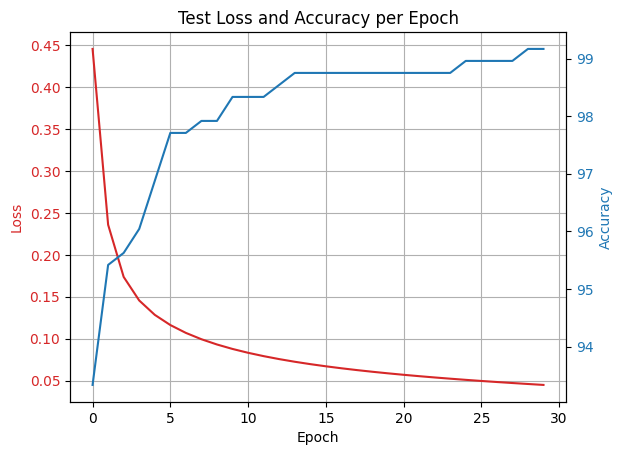

In [5]:
import matplotlib.pyplot as plt

# Extracting loss and accuracy values
epochs = range(len(train_loss_dic))
losses = [train_loss_dic[f'm_epoch_{i}']['loss'] for i in epochs]
accuracies = [train_loss_dic[f'm_epoch_{i}']['accuracy'] for i in epochs]

# Creating plot
fig, ax1 = plt.subplots()

# Plotting loss
color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color=color)
ax1.plot(epochs, losses, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating a second y-axis for accuracy
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color)  # we already handled the x-label with ax1
ax2.plot(epochs, accuracies, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title and grid
plt.title('Test Loss and Accuracy per Epoch')
ax1.grid(True)

# Show plot
plt.show()

In [6]:
train_loss_dic, test_loss_dic = weight_avg_2_classification(30, train_dataloader, test_dataloader, input_size, output_size, device_in_use, model = 'NN') 

data = train_loss_dic

In [7]:
data

{'m1_epoch_0': {'loss': 0.4841278314590454,
  'accuracy': 85.83333333333333,
  'parameters': [[array([[-0.11091396,  0.04439797, -0.06632513, ..., -0.13780487,
             0.06722257,  0.02517539],
           [ 0.12788182,  0.127776  , -0.13765694, ...,  0.14166468,
             0.08743143, -0.04053204],
           [ 0.01126762,  0.08997598,  0.15311837, ...,  0.10656697,
             0.16875285, -0.02703471],
           ...,
           [-0.01588883, -0.06621745, -0.1254828 , ...,  0.14284775,
            -0.05360852,  0.08128819],
           [-0.17530966,  0.14856192,  0.04542005, ..., -0.1575018 ,
            -0.0154494 , -0.03385265],
           [-0.10743357, -0.06419322, -0.10103791, ..., -0.11825233,
            -0.07791078, -0.10374531]], dtype=float32),
    array([-0.06913377,  0.06829226,  0.11622933, ...,  0.12040862,
           -0.086615  ,  0.08507445], dtype=float32),
    array([[-0.01468787,  0.01345199, -0.00870358, ..., -0.01540653,
            -0.00369401,  0.00785863]

In [8]:
data['m1_epoch_0']['parameters']

[[array([[-0.11091396,  0.04439797, -0.06632513, ..., -0.13780487,
           0.06722257,  0.02517539],
         [ 0.12788182,  0.127776  , -0.13765694, ...,  0.14166468,
           0.08743143, -0.04053204],
         [ 0.01126762,  0.08997598,  0.15311837, ...,  0.10656697,
           0.16875285, -0.02703471],
         ...,
         [-0.01588883, -0.06621745, -0.1254828 , ...,  0.14284775,
          -0.05360852,  0.08128819],
         [-0.17530966,  0.14856192,  0.04542005, ..., -0.1575018 ,
          -0.0154494 , -0.03385265],
         [-0.10743357, -0.06419322, -0.10103791, ..., -0.11825233,
          -0.07791078, -0.10374531]], dtype=float32),
  array([-0.06913377,  0.06829226,  0.11622933, ...,  0.12040862,
         -0.086615  ,  0.08507445], dtype=float32),
  array([[-0.01468787,  0.01345199, -0.00870358, ..., -0.01540653,
          -0.00369401,  0.00785863],
         [ 0.00225182, -0.00426057,  0.00656143, ..., -0.0152583 ,
           0.00593822, -0.01264234]], dtype=float32),
  

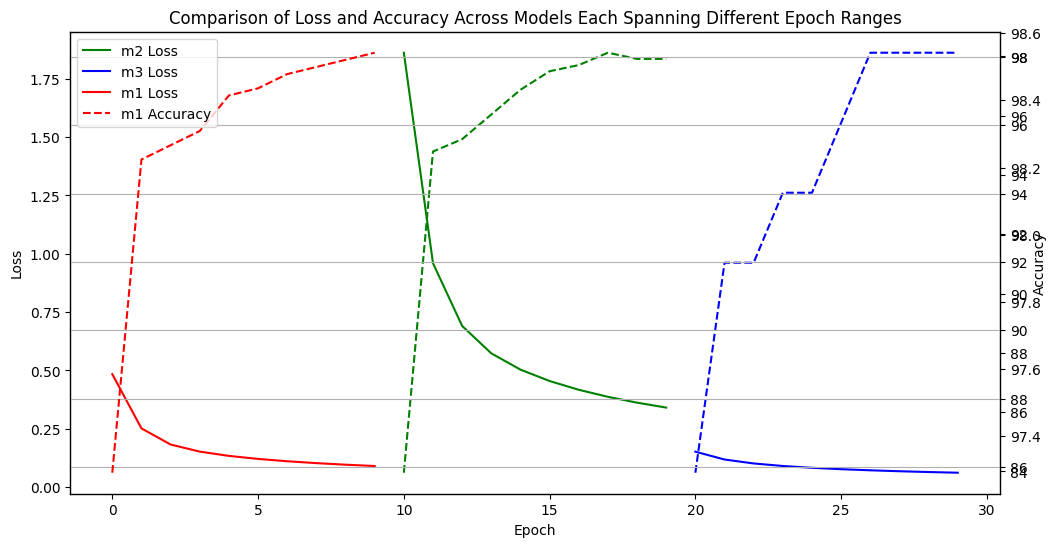

In [9]:
# Setup for 30 epochs
total_epochs = 30
epoch_segments = np.linspace(0, total_epochs, num=total_epochs, endpoint=False)

# Extracting data for each model
models = set(key.split('_')[0] for key in data.keys())
model_epochs = {model: [int(key.split('_')[2]) for key in data.keys() if key.startswith(model)] for model in models}
plot_data = {model: {'loss': np.full(total_epochs, np.nan), 'accuracy': np.full(total_epochs, np.nan)} for model in models}

for model in models:
    for epoch in model_epochs[model]:
        key = f"{model}_epoch_{epoch}"
        offset = (int(model[1]) - 1) * 10  # m1 starts at 0, m2 at 10, m3 at 20
        plot_data[model]['loss'][offset + epoch] = data[key]['loss']
        plot_data[model]['accuracy'][offset + epoch] = data[key]['accuracy']

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

colors = {'m1': 'red', 'm2': 'green', 'm3': 'blue'}

for model in models:
    # Plot loss
    ax1.plot(epoch_segments, plot_data[model]['loss'], label=f'{model} Loss', color=colors[model])
    # Plot accuracy
    ax2 = ax1.twinx()
    ax2.plot(epoch_segments, plot_data[model]['accuracy'], label=f'{model} Accuracy', linestyle='--', color=colors[model])

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax2.set_ylabel('Accuracy')

# Create a combined legend for both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Comparison of Loss and Accuracy Across Models Each Spanning Different Epoch Ranges')
plt.grid(True)
plt.show()

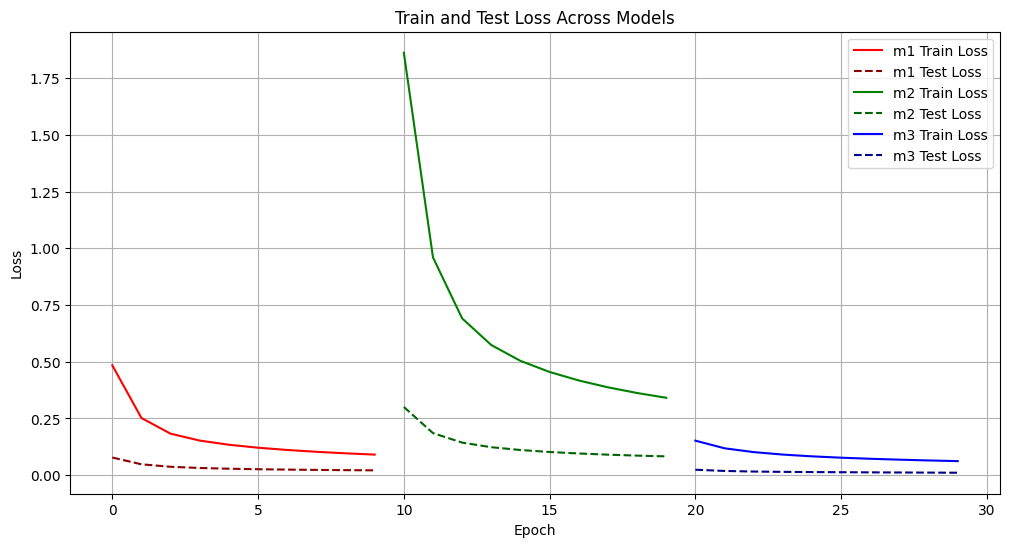

In [10]:
# Setting up plotting for 30 epochs
total_epochs = 30
epoch_segments = np.linspace(0, total_epochs, num=total_epochs, endpoint=False)

# Initialize arrays to hold loss data for all models
plot_data = {}
for key in train_loss_dic.keys():
    model = key.split('_')[0]
    epoch = int(key.split('_')[2])
    if model not in plot_data:
        plot_data[model] = {'train_loss': np.full(total_epochs, np.nan), 'test_loss': np.full(total_epochs, np.nan)}
    offset = (int(model[1]) - 1) * 10
    plot_data[model]['train_loss'][offset + epoch] = train_loss_dic[key]['loss']
    plot_data[model]['test_loss'][offset + epoch] = test_loss_dic[key]['loss']

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

colors_train = {'m1': 'red', 'm2': 'green', 'm3': 'blue'}
colors_test = {'m1': 'darkred', 'm2': 'darkgreen', 'm3': 'darkblue'}

for model in plot_data:
    # Plot train loss
    ax.plot(epoch_segments, plot_data[model]['train_loss'], label=f'{model} Train Loss', color=colors_train[model])
    # Plot test loss
    ax.plot(epoch_segments, plot_data[model]['test_loss'], label=f'{model} Test Loss', linestyle='--', color=colors_test[model])

ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend()
plt.title('Train and Test Loss Across Models')
plt.grid(True)
plt.show()

In [11]:
test_loss_dic.items()

dict_items([('m1_epoch_0', {'loss': 0.07790538867314657, 'accuracy': 97.65625}), ('m1_epoch_1', {'loss': 0.047951018810272215, 'accuracy': 96.875}), ('m1_epoch_2', {'loss': 0.03706987003485362, 'accuracy': 96.875}), ('m1_epoch_3', {'loss': 0.031747316320737205, 'accuracy': 96.875}), ('m1_epoch_4', {'loss': 0.02853910724322001, 'accuracy': 96.875}), ('m1_epoch_5', {'loss': 0.02630450129508972, 'accuracy': 96.875}), ('m1_epoch_6', {'loss': 0.02461924453576406, 'accuracy': 96.875}), ('m1_epoch_7', {'loss': 0.02329860379298528, 'accuracy': 96.875}), ('m1_epoch_8', {'loss': 0.022239085535208383, 'accuracy': 96.875}), ('m1_epoch_9', {'loss': 0.02137269973754883, 'accuracy': 96.875}), ('m2_epoch_0', {'loss': 0.30063242465257645, 'accuracy': 95.3125}), ('m2_epoch_1', {'loss': 0.18536590039730072, 'accuracy': 96.875}), ('m2_epoch_2', {'loss': 0.14363425970077515, 'accuracy': 96.875}), ('m2_epoch_3', {'loss': 0.12328382581472397, 'accuracy': 97.65625}), ('m2_epoch_4', {'loss': 0.1109461896121501

In [12]:
def best_metrics(d):
    """
    Returns the keys corresponding to the minimum loss and maximum accuracy from the dictionary.
    Each entry in the dictionary is expected to be a dictionary with 'loss' and 'accuracy' as keys.
    """
    min_loss = float('inf')
    max_accuracy = float('-inf')
    key_min_loss = None
    key_max_accuracy = None

    for key, metrics in d.items():
        if metrics['loss'] < min_loss:
            min_loss = metrics['loss']
            key_min_loss = key
        if metrics['accuracy'] > max_accuracy:
            max_accuracy = metrics['accuracy']
            key_max_accuracy = key

    return {'min_loss': (key_min_loss, min_loss), 'max_accuracy': (key_max_accuracy, max_accuracy)}

best = best_metrics(train_loss_dic)
best

{'min_loss': ('m3_epoch_9', 0.06199284978210926),
 'max_accuracy': ('m3_epoch_6', 98.54166666666667)}

In [13]:
best['min_loss'][1]

0.06199284978210926

In [14]:
train_loss_traditional = []
test_loss_traditional = []
test_acc_traditional = []

train_loss_2 = []
test_loss_2 = []
test_acc_2 = []

train_loss_8 = []
test_loss_8 = []
test_acc_8 = []

#105 is the lcm(3,7,15)
import numpy as np
from tqdm import tqdm
for i in tqdm(range(10)):

    train_loss_dic, test_loss_dic = regular_classification(30, train_dataloader, test_dataloader, input_size, output_size, device_in_use, model = 'NN') 
    testval = best_metrics(test_loss_dic)['min_loss'][1]
    trainval = best_metrics(train_loss_dic)['min_loss'][1]

    testacc = best_metrics(test_loss_dic)['max_accuracy'][1]

    train_loss_traditional.append(trainval) 
    test_loss_traditional.append(testval)

    test_acc_traditional.append(testacc)

    train_loss_dic, test_loss_dic = weight_avg_2_classification(30, train_dataloader, test_dataloader, input_size, output_size, device_in_use, model = 'NN') 

    testval = best_metrics(test_loss_dic)['min_loss'][1]
    trainval = best_metrics(train_loss_dic)['min_loss'][1]

    testacc = best_metrics(test_loss_dic)['max_accuracy'][1]

    test_acc_2.append(testacc)

    train_loss_2.append(trainval) 
    test_loss_2.append(testval)

    # test_loss_dic, train_loss_dic = weight_avg_8_classification(3*15*5, train_loader, val_loader, input_size, output_size, device_in_use, model = 'NN') 

    # testval = best_metrics(test_loss_dic)['min_loss'][1]
    # trainval = best_metrics(train_loss_dic)['min_loss'][1]

    # testacc = best_metrics(test_loss_dic)['max_accuracy'][1]

    # test_acc_8.append(testacc)

    # train_loss_8.append(trainval) 
    # test_loss_8.append(testval)

print('LOSS')
print("Traditional:",np.mean(test_loss_traditional),np.std(test_loss_traditional))
print("Weight Avg 2 Base Models:",np.mean(test_loss_2),np.std(test_loss_2))
# print("Weight avg 8 loss: ",np.mean(test_loss_8),np.std(test_loss_8))
print('ACC')
print("Traditional:",np.mean(test_acc_traditional),np.std(test_acc_traditional))
print("Weight Avg 2 Base Models:",np.mean(test_acc_2),np.std(test_acc_2))
# print("Weight avg 8 acc: ",np.mean(test_acc_8),np.std(test_acc_8))
# print("Weight Avg 8 Base Models:",np.mean(test_loss_8),np.std(test_loss_8))

100%|██████████| 10/10 [00:39<00:00,  3.96s/it]

LOSS
Traditional: 0.05997346066869795 0.001410200057016929
Weight Avg 2 Base Models: 0.010845616832375527 0.0004537892197393678
ACC
Traditional: 98.125 0.38273277230987157
Weight Avg 2 Base Models: 98.203125 0.358013726168425
